In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns=None

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

In [2]:
df=pd.read_csv('../datos/salary_normalizado.csv', index_col=0)
df.head(2) #Hacemos una vista previa de nuestro DataFrame

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_box
0,2020,Entry-Level,Full-Time,Data Analyst,72000,US,100,US,L,4631.90
1,2020,Mid-Level,Full-Time,Business Data Analyst,135000,US,100,US,L,7311.92


En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

- Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.

In [3]:
# Primero seleccionamos nuestras variables númericas
numericas = df.select_dtypes(include = np.number)
numericas.head()

,work_year,salary_in_usd,remote_ratio,salary_box
0,2020,72000,100,4631.90
1,2020,135000,100,7311.92
2,2020,51321,0,3622.10
3,2020,40481,0,3048.67
4,2020,39916,0,3017.70


Nosotras como hemos visto no tenemos variables númericas continuas para poder estandarizar sin embargo queriamos poner en practicas las funciones aprendidas en clase y hemos aplicado la estandarización a una variable categorica (remote_ratio) (simplemente para practicar las funciones!!!).

In [4]:
numericas.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,311.00,2021.64,0.62,2020.00,2021.00,2022.00,2022.00,2022.00
salary_in_usd,311.00,113940.94,50326.96,5679.00,78263.00,111775.00,145500.00,243900.00
remote_ratio,311.00,71.86,42.93,0.00,50.00,100.00,100.00,100.00
salary_box,311.00,6327.18,2118.21,731.38,4921.17,6375.11,7720.67,11235.12


In [13]:
media = numericas["remote_ratio"].mean()
desviacion = numericas["remote_ratio"].std() 

In [14]:
numericas["ratio_esta"] = (numericas["remote_ratio"] - media) / desviacion
numericas.head(2)

,work_year,salary_in_usd,remote_ratio,salary_box,ratio_esta
0,2020,72000,100,4631.90,0.66
1,2020,135000,100,7311.92,0.66


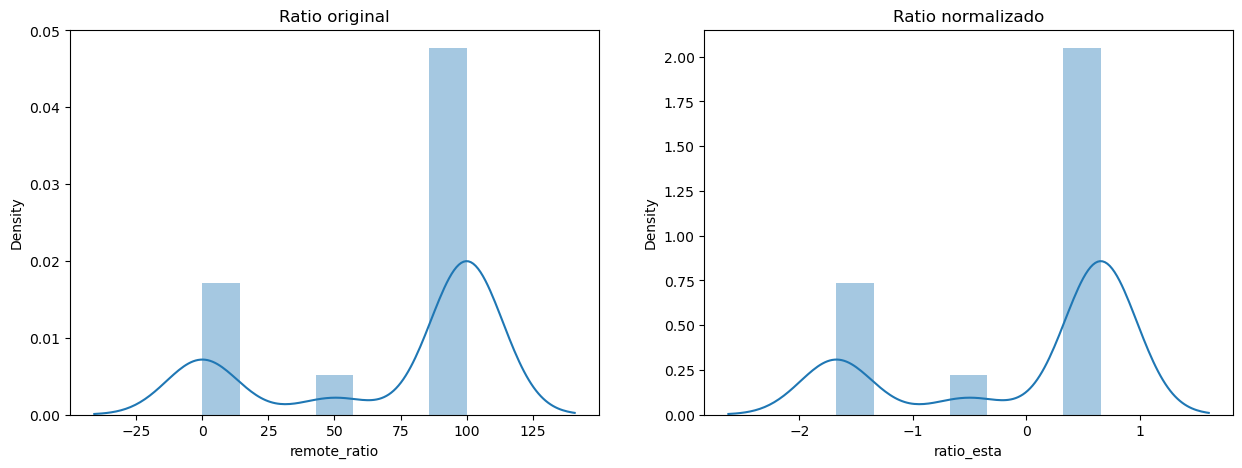

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Ratio original')
axes[1].set_title('Ratio normalizado')

sns.distplot(numericas['remote_ratio'] ,ax = axes[0])
sns.distplot(numericas['ratio_esta'], ax = axes[1]);

In [16]:
print(f'La media de la columna CRIM_ESTA es:  {np.round(numericas["ratio_esta"].mean(),1)}')
print(f'La desviación estándar de la columna CRIM_ESTA es: {np.round(numericas["ratio_esta"].std(),1)}')

La media de la columna CRIM_ESTA es:  0.0
La desviación estándar de la columna CRIM_ESTA es: 1.0


Y listo tendríamos nuestra variable númerica estandarizada, pero repetimos es categorica por lo tanto este ejercicio fue sólo para poner en práctica lo visto en la lección.

- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

No guardaremos el csv porque no queremos estos cambios en nuestro archivo.